In [1]:
%load_ext autoreload

%autoreload 2

import tools as t
import readdata as rm
import predictive_model as m
import evaluate as e

from lentil import models
from lentil import evaluate
from lentil import datatools

import pandas as pd
import numpy as np
import pickle
import math
import constants

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Read Raw Data and Generate Features into 'processed_data.txt'

In [ ]:
rm.getTrainingInstances('raw_data/spanish_data.csv','spanish_processed1.txt', 0, 2, 1, 3)

In [ ]:
rm.getTrainingInstances('raw_data/radical_transfer_2007.csv','radical_processed.txt', 0, 3, 2, 4)

In [ ]:
rm.getTrainingInstances('raw_data/chinese-hundredthousand.csv','chinese_processed.txt', 0, 3, 2, 4, 'pickles/history.pkl')

Convert processed data into Interaction History object

In [ ]:
spanish_history = t.textToInteractionHistory('spanish_processed.txt', 'timestamp', 'student_id','module_id','outcome', 'True')

t.savePickle(spanish_history, 'datasets/spanish.pkl')

In [ ]:
radical_history = t.textToInteractionHistory('radical_processed.txt', 'timestamp', 'student_id','module_id','outcome', 'True')

filtered_radical = t.filterHistory(radical_history.data)
t.savePickle(filtered_radical, 'datasets/radical.pkl')

In [ ]:
chinese_history = t.textToInteractionHistory('chinese_processed.txt', 'timestamp', 'student_id','module_id','outcome', 'True')

t.savePickle(chinese_history, 'datasets/chinese.pkl')

Load ready-to-go datasets from pickles

In [2]:
spanish_history = t.loadPickle('datasets/spanish.pkl')

In [3]:
radical_history = t.loadPickle('datasets/radical.pkl')

In [4]:
chinese_history = t.loadPickle('datasets/chinese.pkl')

In [5]:
chinese_2007_history = t.loadPickle('datasets/chinese_2007.pkl')

In [ ]:
mnemosyne_history = t.loadPickle('datasets/mnemosyne.pkl')

In [ ]:
chinese_spring = t.loadPickle('datasets/chinese_spring.pkl')

In [6]:
french_history = t.loadPickle('datasets/french.pkl')

Check properties of data

In [ ]:
t.getPropertiesOfData(spanish_history, 'SPANISH')

In [ ]:
t.getPropertiesOfData(radical_history, 'RADICAL')

In [ ]:
t.getPropertiesOfData(chinese_history, 'CHINESE 2006')

In [ ]:
t.getPropertiesOfData(chinese_2007_history, 'CHINESE 2007')

In [ ]:
t.getPropertiesOfData(mnemosyne_history, 'MNEMOSYNE')

In [ ]:
t.getPropertiesOfData(french_history, 'FRENCH')

Online Prediction Accuracy: Spanish, Radical and Chinese Datasets

Training population: 20%; Testing population: 80%

In [7]:
#split history
train_chinese, test_chinese = t.splitHistory(chinese_history, 70)

In [8]:
train_spanish, test_spanish = t.splitHistory(spanish_history, 70)

In [9]:
train_radical, test_radical = t.splitHistory(radical_history, 70)

In [10]:
train_chinese_2007, test_chinese_2007 = t.splitHistory(chinese_2007_history, 70)

In [ ]:
train_mnemosyne, test_mnemosyne = t.splitHistory(mnemosyne_history, 70)

In [11]:
train_french, test_french = t.splitHistory(french_history, 70)

Set train and test datasets

In [65]:
total, train, test = french_history, train_french, test_french

Train models

In [66]:
efc_model_1 = e.meta_train_efc(train.data, using_delay=True, strength_var = 'ml')

In [67]:
efc_model_2 = e.meta_train_efc(train.data, using_delay=True, strength_var = 'numreviews')

In [68]:
efc_model_3 = e.meta_train_efc(train.data, using_delay=True, strength_var = 'expo')

In [69]:
efc_model_4 = e.meta_train_efc(train.data, using_delay=True, strength_var = 'settles')

In [46]:
efc_model_irt = e.meta_train_efc(total.data, using_delay=True, strength_var = 'ml', ability=True, difficulty = True)

In [54]:
leitner_model = e.meta_train_efc(train.data, using_delay=True, strength_var = 'leitner')

In [ ]:
onepl_model = e.train_onepl(total.data, total.data)

In [ ]:
random_model = e.train_random(train.data, train.data)

In [ ]:
percentage_model = e.train_percentage(train.data, train.data)

In [ ]:
logistic_model_notime = e.train_logistic(train.data, train.data, using_time=False)

In [ ]:
logistic_model_time = e.train_logistic(train.data, train.data, using_time=True)

Evaluate EFC Models

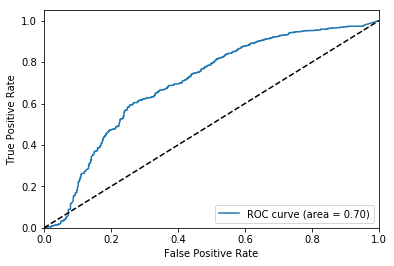

0.69938971816565176

In [70]:
evaluate.training_auc(efc_model_1, test, True)

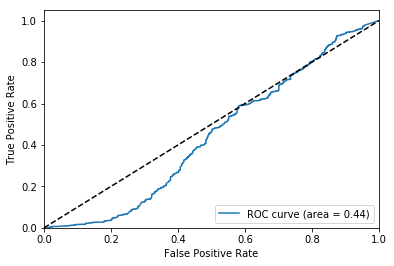

0.44166823840060354

In [71]:
evaluate.training_auc(efc_model_2, test, True)

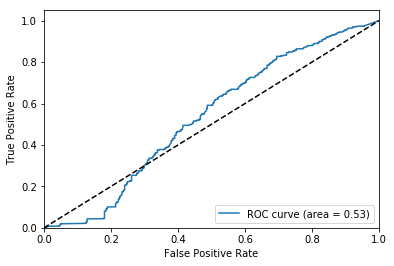

0.53275111817642939

In [72]:
evaluate.training_auc(efc_model_3, test, True)

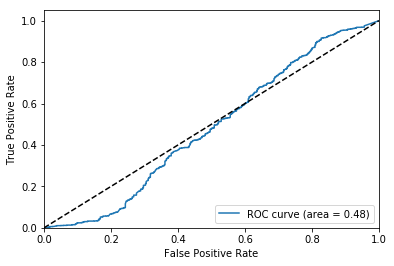

0.48065689497224767

In [73]:
evaluate.training_auc(efc_model_4, test, True)

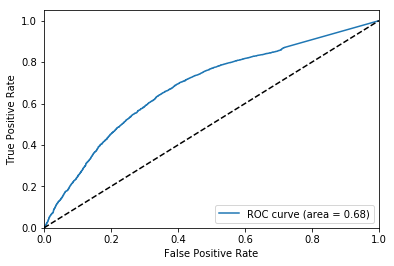

0.68155020774415942

In [52]:
evaluate.training_auc(efc_model_irt, test, True)

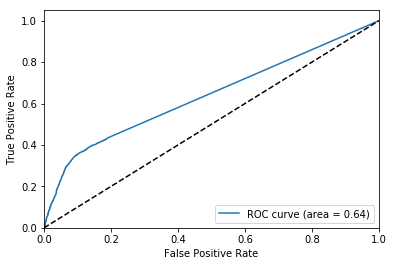

0.63792100836846655

In [56]:
evaluate.training_auc(leitner_model, test, True)

Evaluate Logistic Baselines

In [ ]:
evaluate.training_auc(logistic_model_notime, test, True)

Evaluate Other Models

In [ ]:
evaluate.training_auc(logistic_model_time, test)

In [ ]:
evaluate.training_auc(percentage_model, test, True)

In [ ]:
evaluate.training_auc(random_model, test, True)

In [ ]:
evaluate.training_auc(onepl_model, test, True)

Confusion Matrix

In [ ]:
e.getMetrics(onepl_model, test.data)

In [ ]:
e.getMetrics(efc_model_1, test.data)

In [ ]:
e.getMetrics(efc_model_2, test.data)

In [ ]:
e.getMetrics(efc_model_3, test.data)

In [ ]:
e.getMetrics(logistic_model_notime, test.data)

In [ ]:
e.getMetrics(logistic_model_time, test.data)

Generate Results

In [ ]:
results = e.getResults(total, 5, True)

In [ ]:
results.validation_auc_stderr('LR TIME')

In [ ]:
t.savePickle(results, 'results/chinese_2007_6.pkl')

Read Results

In [ ]:
results1 = t.loadPickle('results/radical_2.pkl')
results2 = t.loadPickle('results/chinese_2007_2.pkl')
results3 = t.loadPickle('results/french_test.pkl')

In [86]:
results = t.loadPickle('results/secondattempt/chinese_2006_0.pkl')

In [88]:
e.overallAccuracy(['EFC ALL', 'EFC REVIEWS', 'EFC SETTLES', 'EFC EXPO','LEITNER'], results, 'AUC', 'Chinese 2007', False, True)

Testing

In [ ]:
hybrid_model = e.meta_train_efc(total.data, using_delay=True, strength_var = 'ml')

In [ ]:
print hybrid_model.clf.coef_
print hybrid_model.clf.intercept_

Testing to make sure the values align with heuristic rules

In [ ]:
print train.data.loc[3]
print train.data.loc[4]

In [ ]:
hybrid_model.assessment_pass_likelihoods(train.data.loc[3:4])

In [ ]:
e.getMetrics(hybrid_model, test.data)